In [1]:
import pandas as pd
import numpy as np
import hvplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
data = pd.read_csv("NYPD_shooting.csv")
data_year_tod = pd.read_csv("Year_To_Date_.csv")

In [3]:
print(f"In 2020, there are {data_year_tod.shape[0]} incidents.")

In 2020, there are 664 incidents.


In [4]:
print(f"Before 2020, there are {data.shape[0]} incidents.")

Before 2020, there are 21626 incidents.


In [5]:
#combined two data sets( 2006 - 2020)
df = pd.concat([data,data_year_tod],axis = 0)
print(f"After combining two datasets, there are {df.shape[0]} incidents in total.")

After combining two datasets, there are 22290 incidents in total.


In [6]:
df.columns

Index(['BORO', 'INCIDENT_KEY', 'JURISDICTION_CODE', 'LOCATION_DESC',
       'Latitude', 'Lon_Lat', 'Longitude', 'New Georeferenced Column',
       'OCCUR_DATE', 'OCCUR_TIME', 'PERP_AGE_GROUP', 'PERP_RACE', 'PERP_SEX',
       'PRECINCT', 'STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD'],
      dtype='object')

In [7]:
#Drop columns
df.drop(columns= ['JURISDICTION_CODE', 'LOCATION_DESC','Latitude', 'Lon_Lat', 'Longitude', 
                  'New Georeferenced Column','PRECINCT','PERP_AGE_GROUP', 'PERP_RACE', 'PERP_SEX','X_COORD_CD', 
                  'Y_COORD_CD'],inplace = True)

In [8]:
df.columns

Index(['BORO', 'INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME',
       'STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [9]:
df.head()

,BORO,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,QUEENS,74146165,08/14/2010,3:11:00,False,25-44,BLACK,M
1,BROOKLYN,66928846,10/17/2009,18:03:00,True,45-64,BLACK,M
2,BROOKLYN,29114164,05/18/2007,23:00:00,False,25-44,BLACK,M
3,BROOKLYN,85180336,06/09/2012,17:15:00,False,25-44,BLACK,M
4,BRONX,73405770,06/27/2010,4:14:00,False,25-44,BLACK,M


In [10]:
miss_check = pd.DataFrame({"Number of Missing":df.isnull().sum(),
                           "Percentage of Missing":df.isnull().sum()/df.shape[0]})

In [11]:
miss_check

,Number of Missing,Percentage of Missing
BORO,0,0.0
INCIDENT_KEY,0,0.0
OCCUR_DATE,0,0.0
OCCUR_TIME,0,0.0
STATISTICAL_MURDER_FLAG,0,0.0
VIC_AGE_GROUP,0,0.0
VIC_RACE,0,0.0
VIC_SEX,0,0.0


In [12]:
df.shape

(22290, 8)

In [13]:
miss_drop = df.dropna()

In [14]:
# VIC_AGE transforming
miss_drop['VIC_AGE_18'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "<18",1,0)
miss_drop['VIC_AGE_18_24'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "18-24",1,0)
miss_drop['VIC_AGE_25_44'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "25-44",1,0)
miss_drop['VIC_AGE_45_64'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "45-64",1,0)
miss_drop['VIC_AGE_65'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "65+",1,0)

In [15]:
# victim gender transforming
miss_drop['VIC_SEX_MALE'] = np.where(np.array(miss_drop['VIC_SEX']) == "M",1,0)
miss_drop['VIC_SEX_FEMALE'] = np.where(np.array(miss_drop['VIC_SEX']) == "F",1,0)

In [16]:
miss_drop.VIC_RACE.unique()

array(['BLACK', 'BLACK HISPANIC', 'WHITE HISPANIC', 'WHITE',
       'ASIAN / PACIFIC ISLANDER', 'UNKNOWN',
       'AMERICAN INDIAN/ALASKAN NATIVE'], dtype=object)

In [17]:
# victim race transforming
miss_drop['VIC_RACE_BLACK'] = np.where(np.array(miss_drop['VIC_RACE']) == "BLACK",1,0)
miss_drop['VIC_RACE_BLACK_HIS'] = np.where(np.array(miss_drop['VIC_RACE']) == 'BLACK HISPANIC',1,0)
miss_drop['VIC_RACE_WHITE_HIS'] = np.where(np.array(miss_drop['VIC_RACE']) == 'WHITE HISPANIC',1,0)
miss_drop['VIC_RACE_ASIAN_PAR'] = np.where(np.array(miss_drop['VIC_RACE']) == 'ASIAN / PACIFIC ISLANDER',1,0)
miss_drop['VIC_RACE_AMERICAN_ALA'] = np.where(np.array(miss_drop['VIC_RACE']) == 'AMERICAN INDIAN/ALASKAN NATIVE',1,0)

In [18]:
miss_drop.BORO.unique()

array(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

In [19]:
#  boro transforming
miss_drop['BORO_QUEENS'] = np.where(np.array(miss_drop['BORO']) == 'QUEENS',1,0)
miss_drop['BORO_BROOKLYN'] = np.where(np.array(miss_drop['BORO']) == 'BROOKLYN',1,0)
miss_drop['BORO_BRONX'] = np.where(np.array(miss_drop['BORO']) == 'BRONX',1,0)
miss_drop['BORO_MANHATTAN'] = np.where(np.array(miss_drop['BORO']) == 'MANHATTAN',1,0)
miss_drop['BORO_STATEN'] = np.where(np.array(miss_drop['BORO']) == 'STATEN ISLAND',1,0)

In [20]:
#Date processing and get Year, Month, Day
import datetime as dt
miss_drop.OCCUR_DATE = pd.to_datetime(miss_drop.OCCUR_DATE)
miss_drop['OCCUR_YEAR'] = miss_drop.OCCUR_DATE.dt.year
miss_drop['OCCUR_MONTH'] = miss_drop.OCCUR_DATE.dt.month
miss_drop['OCCUR_Day'] = miss_drop.OCCUR_DATE.dt.day
miss_drop['OCCUR_Hour'] = pd.to_datetime(miss_drop.OCCUR_TIME).dt.hour

In [21]:
full_data = miss_drop.copy()

In [22]:
full_data.columns

Index(['BORO', 'INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME',
       'STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'VIC_AGE_18', 'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64',
       'VIC_AGE_65', 'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN', 'OCCUR_YEAR', 'OCCUR_MONTH',
       'OCCUR_Day', 'OCCUR_Hour'],
      dtype='object')

In [23]:
#drop columns
full_data = full_data.drop(columns=['STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX','BORO'])

In [24]:
full_data.head()


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,VIC_AGE_18,VIC_AGE_18_24,VIC_AGE_25_44,VIC_AGE_45_64,VIC_AGE_65,VIC_SEX_MALE,VIC_SEX_FEMALE,...,VIC_RACE_AMERICAN_ALA,BORO_QUEENS,BORO_BROOKLYN,BORO_BRONX,BORO_MANHATTAN,BORO_STATEN,OCCUR_YEAR,OCCUR_MONTH,OCCUR_Day,OCCUR_Hour
0,74146165,2010-08-14,3:11:00,0,0,1,0,0,1,0,...,0,1,0,0,0,0,2010,8,14,3
1,66928846,2009-10-17,18:03:00,0,0,0,1,0,1,0,...,0,0,1,0,0,0,2009,10,17,18
2,29114164,2007-05-18,23:00:00,0,0,1,0,0,1,0,...,0,0,1,0,0,0,2007,5,18,23
3,85180336,2012-06-09,17:15:00,0,0,1,0,0,1,0,...,0,0,1,0,0,0,2012,6,9,17
4,73405770,2010-06-27,4:14:00,0,0,1,0,0,1,0,...,0,0,0,1,0,0,2010,6,27,4


In [25]:
full_data.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'VIC_AGE_18',
       'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64', 'VIC_AGE_65',
       'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN', 'OCCUR_YEAR', 'OCCUR_MONTH',
       'OCCUR_Day', 'OCCUR_Hour'],
      dtype='object')

In [26]:
#Group by Year, Month to get monthly data
full_data_group = full_data.groupby(['OCCUR_YEAR',"OCCUR_MONTH"])['VIC_AGE_18',
       'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64', 'VIC_AGE_65',
       'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN'].sum()

In [27]:
full_data_group.head()

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  \
OCCUR_YEAR OCCUR_MONTH                                             
2006       1                    15             58             51   
           2                    11             38             40   
           3                    14             46             36   
           4                    21             64             62   
           5                    29             73             63   

                        VIC_AGE_45_64  VIC_AGE_65  VIC_SEX_MALE  \
OCCUR_YEAR OCCUR_MONTH                                            
2006       1                        5           0           123   
           2                        8           0            91   
           3                        6           0            96   
           4                        7           2           144   
           5                        6           2           161   

                        VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
OCCUR_YEAR OCCUR_MONTH                                                       
2006       1                         6              86                   6   
           2                         6              63                   4   
           3                         6              74                   1   
           4                        12             103                   2   
           5                        12             126                   3   

                        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  \
OCCUR_YEAR OCCUR_MONTH                                           
2006       1                            24                   6   
           2                            21                   5   
           3                            22                   1   
           4                            47                   1   
           5                            40                   0   

                        VIC_RACE_AMERICAN_ALA  BORO_QUEENS  BORO_BROOKLYN  \
OCCUR_YEAR OCCUR_MONTH                                                      
2006       1                                0           18             49   
           2                                0           23             34   
           3                                0            9             48   
           4                                0           29             54   
           5                                0           18             80   

                        BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  
OCCUR_YEAR OCCUR_MONTH                                           
2006       1                    40              16            6  
           2                    22              16            2  
           3                    27              14            4  
           4                    46              20            7  
           5                    46              27            2

In [28]:
number_of_incident = full_data.groupby(['OCCUR_YEAR',"OCCUR_MONTH"]).count()['INCIDENT_KEY'].values

In [29]:
full_data_group['Number_of_Incident'] = number_of_incident

In [30]:
full_data_group.head()

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  \
OCCUR_YEAR OCCUR_MONTH                                             
2006       1                    15             58             51   
           2                    11             38             40   
           3                    14             46             36   
           4                    21             64             62   
           5                    29             73             63   

                        VIC_AGE_45_64  VIC_AGE_65  VIC_SEX_MALE  \
OCCUR_YEAR OCCUR_MONTH                                            
2006       1                        5           0           123   
           2                        8           0            91   
           3                        6           0            96   
           4                        7           2           144   
           5                        6           2           161   

                        VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
OCCUR_YEAR OCCUR_MONTH                                                       
2006       1                         6              86                   6   
           2                         6              63                   4   
           3                         6              74                   1   
           4                        12             103                   2   
           5                        12             126                   3   

                        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  \
OCCUR_YEAR OCCUR_MONTH                                           
2006       1                            24                   6   
           2                            21                   5   
           3                            22                   1   
           4                            47                   1   
           5                            40                   0   

                        VIC_RACE_AMERICAN_ALA  BORO_QUEENS  BORO_BROOKLYN  \
OCCUR_YEAR OCCUR_MONTH                                                      
2006       1                                0           18             49   
           2                                0           23             34   
           3                                0            9             48   
           4                                0           29             54   
           5                                0           18             80   

                        BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
OCCUR_YEAR OCCUR_MONTH                                            
2006       1                    40              16            6   
           2                    22              16            2   
           3                    27              14            4   
           4                    46              20            7   
           5                    46              27            2   

                        Number_of_Incident  
OCCUR_YEAR OCCUR_MONTH                      
2006       1                           129  
           2                            97  
           3                           102  
           4                           156  
           5                           173

In [31]:
full_data_group.tail(6)

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  \
OCCUR_YEAR OCCUR_MONTH                                             
2020       1                     5             19             57   
           2                     2             15             31   
           3                     3             17             45   
           4                     4             19             39   
           5                     6             35             71   
           6                    17             72            146   

                        VIC_AGE_45_64  VIC_AGE_65  VIC_SEX_MALE  \
OCCUR_YEAR OCCUR_MONTH                                            
2020       1                        8           0            80   
           2                        1           0            47   
           3                        6           0            64   
           4                        5           1            67   
           5                       12           2           113   
           6                       21           1           221   

                        VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
OCCUR_YEAR OCCUR_MONTH                                                       
2020       1                         9              57                   7   
           2                         4              34                   2   
           3                         7              57                   7   
           4                         2              52                   4   
           5                        12              82                  14   
           6                        32             194                  24   

                        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  \
OCCUR_YEAR OCCUR_MONTH                                           
2020       1                            19                   1   
           2                             9                   0   
           3                             5                   2   
           4                            10                   2   
           5                            27                   0   
           6                            30                   3   

                        VIC_RACE_AMERICAN_ALA  BORO_QUEENS  BORO_BROOKLYN  \
OCCUR_YEAR OCCUR_MONTH                                                      
2020       1                                0           19             25   
           2                                0           17             14   
           3                                0            9             28   
           4                                0            9             29   
           5                                0           25             47   
           6                                0           36            106   

                        BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
OCCUR_YEAR OCCUR_MONTH                                            
2020       1                    24              20            1   
           2                    11               6            3   
           3                    13              18            3   
           4                    19              10            2   
           5                    28              18            8   
           6                    78              34            4   

                        Number_of_Incident  
OCCUR_YEAR OCCUR_MONTH                      
2020       1                            89  
           2                            51  
           3                            71  
           4                            69  
           5                           126  
           6                           258

In [32]:
full_data_group.reset_index().shape

(174, 20)

In [33]:
#Unemployment processing

unemployment = pd.read_csv('UnemploymentRate.csv')

In [34]:
unemployment.head()


,Date,PX_LAST
0,9/30/2020,7.9
1,8/31/2020,8.4
2,7/31/2020,10.2
3,6/30/2020,11.1
4,5/31/2020,13.3


In [35]:
unemployment.tail()

,Date,PX_LAST
172,5/31/2006,4.6
173,4/30/2006,4.7
174,3/31/2006,4.7
175,2/28/2006,4.8
176,1/31/2006,4.7


In [36]:
unemployment.Date = pd.to_datetime(unemployment.Date)
unemployment['Year'] = unemployment.Date.dt.year
unemployment['Month'] = unemployment.Date.dt.month

In [37]:
unemployment_group = unemployment.groupby(['Year','Month'])['PX_LAST'].mean()


In [38]:
unemployment_group = pd.DataFrame(unemployment_group)
unemployment_group.head()
unemployment_group.reset_index(inplace = True)

In [39]:
unemployment_group.rename(columns= {'PX_LAST':"UnemploymentRate"},inplace = True)

In [40]:
unemployment_group.head()

,Year,Month,UnemploymentRate
0,2006,1,4.7
1,2006,2,4.8
2,2006,3,4.7
3,2006,4,4.7
4,2006,5,4.6


In [41]:
# NYC Empire dataset

ny_empire = pd.read_csv('NY.Empire.csv')
ny_empire.head()

,Date,PX_LAST
0,9/30/2020,17.0
1,8/31/2020,3.7
2,7/31/2020,17.2
3,6/30/2020,-0.2
4,5/31/2020,-48.5


In [42]:
ny_empire.Date = pd.to_datetime(ny_empire.Date)
ny_empire['Year'] = ny_empire.Date.dt.year
ny_empire['Month'] = ny_empire.Date.dt.month
ny_empire.rename(columns= {'PX_LAST':"NY_Empire"},inplace = True)
ny_empire = ny_empire.groupby(['Year','Month'])['NY_Empire'].mean()

In [43]:
ny_empire = pd.DataFrame(ny_empire)
ny_empire.head()

NY_Empire
Year Month           
2005 1           15.6
     2           17.1
     3           24.3
     4            8.3
     5           -4.9

In [44]:
#GDP data upload
gdp = pd.read_csv('GDP.csv')
gdp.head()

,Date,PX_LAST
0,6/30/2020,-31.4
1,3/31/2020,-5.0
2,12/31/2019,2.4
3,9/30/2019,2.6
4,6/30/2019,1.5


In [45]:
gdp.Date = pd.to_datetime(gdp.Date)
gdp = gdp.set_index('Date').resample('M').interpolate(method = 'ffill', 
                                                       limit_direction = 'backward').fillna(method = 'ffill')


In [46]:
gdp.head()

,PX_LAST
Date,
2005-03-31,4.5
2005-04-30,4.5
2005-05-31,4.5
2005-06-30,1.9
2005-07-31,1.9


In [47]:
gdp = gdp.reset_index()
gdp['Year'] = gdp.Date.dt.year
gdp['Month'] = gdp.Date.dt.month
gdp.rename(columns= {'PX_LAST':"GDP"},inplace = True)
gdp = gdp.drop(columns = ['Date'])

In [48]:
#Combine those four dataset(gun shooting + employment + gdp + ny_empire)
combined = pd.concat([full_data_group,unemployment_group.set_index(['Year','Month']),ny_empire,
                     gdp.set_index(['Year','Month'])],
                    join='inner',axis = 1,sort = True)


In [49]:
final_data = pd.DataFrame(combined)

In [50]:
final_data.head()

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  VIC_AGE_45_64  VIC_AGE_65  \
2006 1          15             58             51              5           0   
     2          11             38             40              8           0   
     3          14             46             36              6           0   
     4          21             64             62              7           2   
     5          29             73             63              6           2   

        VIC_SEX_MALE  VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
2006 1           123               6              86                   6   
     2            91               6              63                   4   
     3            96               6              74                   1   
     4           144              12             103                   2   
     5           161              12             126                   3   

        VIC_RACE_WHITE_HIS  ...  VIC_RACE_AMERICAN_ALA  BORO_QUEENS  \
2006 1                  24  ...                      0           18   
     2                  21  ...                      0           23   
     3                  22  ...                      0            9   
     4                  47  ...                      0           29   
     5                  40  ...                      0           18   

        BORO_BROOKLYN  BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
2006 1             49          40              16            6   
     2             34          22              16            2   
     3             48          27              14            4   
     4             54          46              20            7   
     5             80          46              27            2   

        Number_of_Incident  UnemploymentRate  NY_Empire  GDP  
2006 1                 129               4.7       17.5  2.6  
     2                  97               4.8       20.9  2.6  
     3                 102               4.7       33.2  5.4  
     4                 156               4.7       18.5  5.4  
     5                 173               4.6       18.6  5.4  

[5 rows x 21 columns]

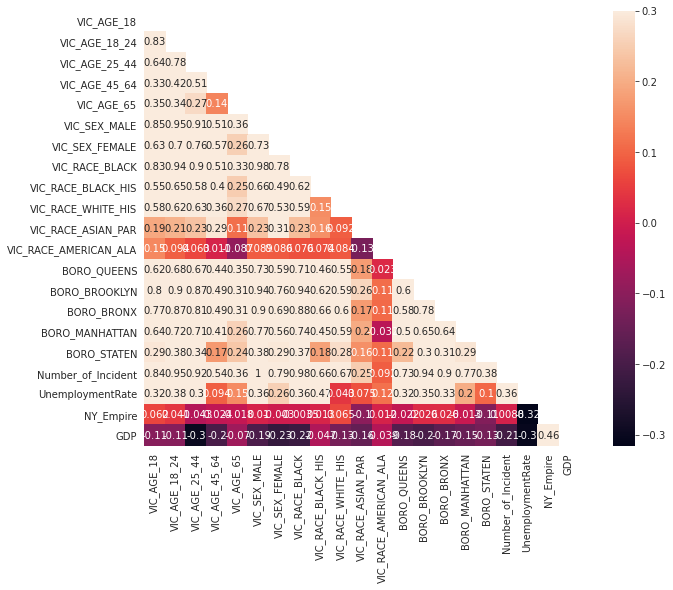

In [115]:
#Visualization of correlation
import seaborn as sns
import matplotlib.pyplot as plt
corr = final_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot= True)

In [52]:
full_df = final_data.reset_index().drop(columns = ['level_0', 'level_1'])
full_df.head().T

,0,1,2,3,4
VIC_AGE_18,15.0,11.0,14.0,21.0,29.0
VIC_AGE_18_24,58.0,38.0,46.0,64.0,73.0
VIC_AGE_25_44,51.0,40.0,36.0,62.0,63.0
VIC_AGE_45_64,5.0,8.0,6.0,7.0,6.0
VIC_AGE_65,0.0,0.0,0.0,2.0,2.0
VIC_SEX_MALE,123.0,91.0,96.0,144.0,161.0
VIC_SEX_FEMALE,6.0,6.0,6.0,12.0,12.0
VIC_RACE_BLACK,86.0,63.0,74.0,103.0,126.0
VIC_RACE_BLACK_HIS,6.0,4.0,1.0,2.0,3.0
VIC_RACE_WHITE_HIS,24.0,21.0,22.0,47.0,40.0


In [53]:
y = full_df.Number_of_Incident
X = full_df.drop(columns = ['Number_of_Incident'])

In [54]:
X.head().T

,0,1,2,3,4
VIC_AGE_18,15.0,11.0,14.0,21.0,29.0
VIC_AGE_18_24,58.0,38.0,46.0,64.0,73.0
VIC_AGE_25_44,51.0,40.0,36.0,62.0,63.0
VIC_AGE_45_64,5.0,8.0,6.0,7.0,6.0
VIC_AGE_65,0.0,0.0,0.0,2.0,2.0
VIC_SEX_MALE,123.0,91.0,96.0,144.0,161.0
VIC_SEX_FEMALE,6.0,6.0,6.0,12.0,12.0
VIC_RACE_BLACK,86.0,63.0,74.0,103.0,126.0
VIC_RACE_BLACK_HIS,6.0,4.0,1.0,2.0,3.0
VIC_RACE_WHITE_HIS,24.0,21.0,22.0,47.0,40.0


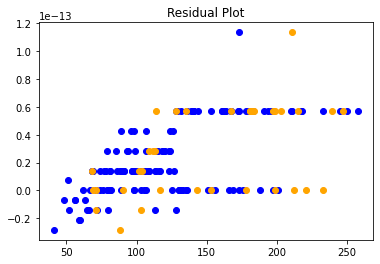

In [55]:
#Simple linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)


from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs =1)
model.fit(X_train, y_train)

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c = "blue", label = "training data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c = "orange", label = "testing data")
plt.title("Residual Plot")
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#score = model.score(X, y, sample_weight=None)
r2 = model.score(X_train, model.predict(X_train))
mse = mean_squared_error(y_test, model.predict(X_test)) #
rmse = np.sqrt(mse)
r2_adjusted = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
#std = np.std(y)
print(r2)
print(mse)
print(rmse)
print(r2_adjusted)

1.0
1.782915801331512e-27
4.222458763956745e-14
1.0


In [59]:
# PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [60]:
y.head()

0    129
1     97
2    102
3    156
4    173
Name: Number_of_Incident, dtype: int64

In [61]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[0:2]

array([[ 0.11866273,  0.38884457, -0.21035248, -0.85175775, -0.88195388,
         0.15542101, -0.85980998, -0.15061989, -0.86731795,  0.58845059,
         2.51956053, -0.21021383, -0.13985976, -0.15466149,  0.21723795,
         0.02365833,  0.81157133, -0.69998439,  0.75599191,  0.31602605],
       [-0.33512441, -0.51993925, -0.75222952, -0.06342877, -0.88195388,
        -0.56874987, -0.85980998, -0.76444962, -1.14195549,  0.27210537,
         1.93502249, -0.21021383,  0.44513057, -0.78935721, -0.93206823,
         0.02365833, -0.68671421, -0.65499093,  0.98064773,  0.31602605]])

In [62]:
#pd.DataFrame(X_scaled).to_csv("X_scaled.csv")
#y.to_csv('y.csv')

In [63]:
# determine the number of principal components by linear regression
def pcr(X,y,n):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import r2_score,mean_squared_error
    score_c = []
    score_cv= []
    mse_c = []
    mse_cv = []
    for i in range(1,n+1):
        pca = PCA(n_components= i )
        X_pca = pca.fit_transform(X)

        regr = LinearRegression()
# Fit
        regr.fit(X_pca, y)
# Calibration
        y_c = regr.predict(X_pca)
# Cross-validation
        y_cv = cross_val_predict(regr, X_pca, y, cv=100)
# Calculate scores for calibration and cross-validation
        score_c.append(r2_score(y, y_c))
        score_cv.append(r2_score(y, y_cv))
# Calculate mean square error for calibration and cross validation
        mse_c.append(mean_squared_error(y, y_c))
        mse_cv.append(mean_squared_error(y, y_cv))
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

In [64]:
y_cv, score_c, score_cv, mse_c, mse_cv = pcr(X_scaled,y,20)

<AxesSubplot:>

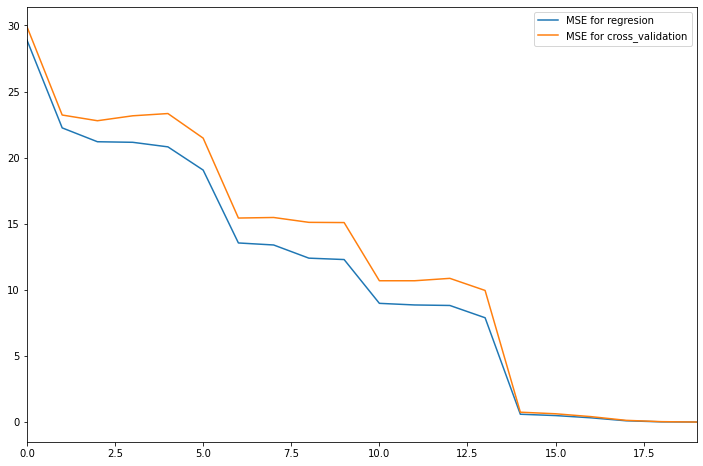

In [65]:
mse = {"MSE for regresion": mse_c, "MSE for cross_validation": mse_cv}
mse = pd.DataFrame(mse)
mse.plot(figsize = (12,8))

<AxesSubplot:>

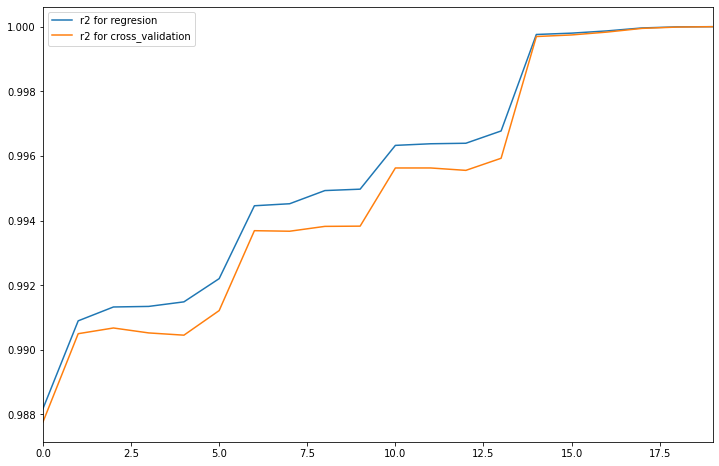

In [66]:
r2 = {"r2 for regresion": score_c, "r2 for cross_validation": score_cv}
r2 = pd.DataFrame(r2)
r2.plot(figsize = (12, 8))

In [67]:
pca = PCA(n_components=13)
X_scaled_pca = pca.fit_transform(X_scaled)


In [68]:
df_pca = pd.DataFrame(
    data=X_scaled_pca, columns=["Principal Component 1", "Principal Component 2","Principal Component 3",
                               "Principal Component 4","Principal Component 5","Principal Component 6",
                               "Principal Component 7","Principal Component 8","Principal Component 9",
                               "Principal Component 10","Principal Component 11","Principal Component 12",
                                "Principal Component 13"]
)
df_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13
0,-0.265767,-0.667512,-1.445255,0.434695,0.184588,1.372831,-1.330957,-1.872806,-0.206946,0.527697,-0.362081,-0.594239,-0.813188
1,-1.847229,-0.695020,-1.574309,-0.056044,0.856821,0.332429,0.076041,-1.637616,-0.751090,0.589911,-0.872347,-0.744782,-0.149603
2,-2.122937,-2.207385,-0.132410,0.700365,0.035621,0.031346,-0.855120,-0.535735,0.207306,0.492460,-0.578597,0.651151,-0.531642
3,1.785256,-2.214698,-0.925720,2.036858,-1.999950,-0.540629,0.220186,-0.563512,-1.224599,0.435032,-0.397470,0.421703,-0.650979
4,2.250606,-2.657636,-0.119345,1.158663,-1.466591,-1.688618,-0.168515,-1.270445,0.138697,-1.036017,-0.257520,0.818915,-0.269538


In [69]:
df_pca.shape

(174, 13)

In [70]:
y.shape

(174,)

In [71]:
np.round(pca.explained_variance_ratio_, decimals=4)*100

array([48.32,  8.49,  6.34,  5.48,  5.17,  4.52,  3.66,  3.33,  2.57,
        2.49,  1.99,  1.78,  1.62])

In [72]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)



array([48.32, 56.81, 63.15, 68.63, 73.8 , 78.32, 81.98, 85.31, 87.88,
       90.37, 92.36, 94.14, 95.76])

In [73]:
df_variance = {"Variance": np.round(pca.explained_variance_ratio_, decimals=4)*100, 
            "Accumulative Variance": np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)}

In [74]:
df_variance = pd.DataFrame(df_variance,index = df_pca.columns)
df_variance

,Variance,Accumulative Variance
Principal Component 1,48.32,48.32
Principal Component 2,8.49,56.81
Principal Component 3,6.34,63.15
Principal Component 4,5.48,68.63
Principal Component 5,5.17,73.80
Principal Component 6,4.52,78.32
Principal Component 7,3.66,81.98
Principal Component 8,3.33,85.31
Principal Component 9,2.57,87.88
Principal Component 10,2.49,90.37


In [75]:
# Data split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pca, 
                                                    y, 
                                                    random_state=42, 
                                                   )

In [76]:
# linear regression 
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predicted_lr = model_lr.predict(X_test)



In [77]:
# Linear Regression evaluation
from sklearn.metrics import r2_score,mean_squared_error
score_lr = model_lr.score(X_train, y_train, sample_weight=None)
r2__lr = r2_score(y_test, predicted_lr)
mse_lr = mean_squared_error(y_test
                            , predicted_lr)
rmse_lr = np.sqrt(mse_lr)

In [78]:
linear_reg = pd.DataFrame({'Model Score':score_lr,"r2 stat":r2__lr,'MSE':mse_lr,"Root MSE": rmse_lr },index=[0]).T
linear_reg.columns = ['Metrics for linear regression']

In [79]:
linear_reg

,Metrics for linear regression
Model Score,0.996606
r2 stat,0.994564
MSE,16.556221
Root MSE,4.068934


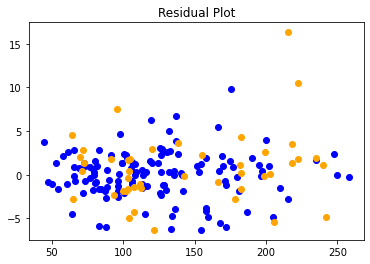

In [80]:
plt.scatter(model_lr.predict(X_train), model_lr.predict(X_train) - y_train, c = "blue", label = "training data")
plt.scatter(model_lr.predict(X_test), model_lr.predict(X_test) - y_test, c = "orange", label = "testing data")
plt.title("Residual Plot")
plt.show()

In [81]:
#Decision Tree Regression
model_dt = DecisionTreeRegressor(criterion='mse',splitter="best")
model_dt.fit(X_train,y_train)
predicted_dt = model_dt.predict(X_test)


In [82]:
# Decision Tree evaluation
score_dt = model_dt.score(X_train, y_train, sample_weight=None)
r2__dt = r2_score(y_test, predicted_dt)
mse_dt = mean_squared_error(y_test
                            , predicted_dt)
rmse_dt = np.sqrt(mse_dt)

In [83]:
dt_reg = pd.DataFrame({'Model Score':score_dt,"r2 stat":r2__dt,'MSE':mse_dt,"Root MSE": rmse_dt },index=[0]).T
dt_reg.columns = ['Metrics for decision tree regression']

In [84]:
dt_reg

,Metrics for decision tree regression
Model Score,1.000000
r2 stat,0.966801
MSE,101.113636
Root MSE,10.055528


In [85]:
#Random Forest Regression
model_rf = RandomForestRegressor(n_estimators= 100, criterion= "mse")
model_rf.fit(X_train,y_train)
predicted_rf= model_rf.predict(X_test)

In [86]:
# Random forest evaluation
score_rf = model_rf.score(X_train, y_train, sample_weight=None)
r2__rf = r2_score(y_test, predicted_rf)
mse_rf = mean_squared_error(y_test
                            , predicted_rf)
rmse_rf = np.sqrt(mse_rf)

In [87]:
rf_reg = pd.DataFrame({'Model Score':score_rf,"r2 stat":r2__rf,'MSE':mse_rf,"Root MSE": rmse_rf },index=[0]).T
rf_reg.columns = ['Metrics for  random forest regression']

In [88]:
rf_reg

,Metrics for random forest regression
Model Score,0.996054
r2 stat,0.983223
MSE,51.096634
Root MSE,7.148191


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='1'>

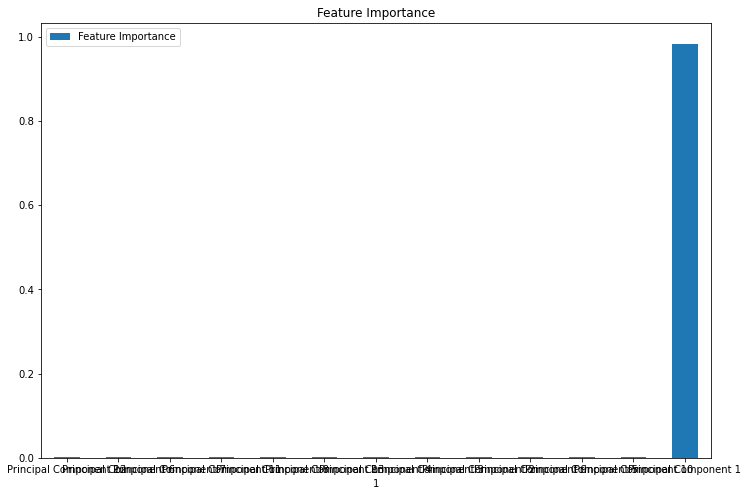

In [89]:
#feature importance
importance_df = pd.DataFrame(sorted(zip(model_rf.feature_importances_,X_train.columns),reverse = True))
importance_df.set_index(importance_df[1],inplace = True)
importance_df.drop(columns = 1,inplace = True)
importance_df.rename(columns = {0: "Feature Importance"},inplace = True)
importance_sorted = importance_df.sort_values(by="Feature Importance")
importance_sorted.plot(kind = "bar",title = 'Feature Importance',figsize = (12,8),rot = 360)

In [90]:
#GradientBoostingRegressor
#choose learning rate
learning_rates = [0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    model = GradientBoostingRegressor(n_estimators=100,learning_rate = learning_rate,loss= 'ls')
    model.fit(X_train,y_train)
    print("Learning rate:", learning_rate)
    print(f"Root mean squared error is {mean_squared_error(y_train,model.predict(X_train))}.")

Learning rate: 0.05
Root mean squared error is 3.1666925704332245.
Learning rate: 0.1
Root mean squared error is 0.5653545383480996.
Learning rate: 0.25
Root mean squared error is 0.007537301505267128.
Learning rate: 0.5
Root mean squared error is 9.952943807097053e-06.
Learning rate: 0.75
Root mean squared error is 8.737289105636363e-09.
Learning rate: 1
Root mean squared error is 3.139172411120472e-11.


In [91]:
# Learning rate is equal to 0.25
model_gb = GradientBoostingRegressor(n_estimators=100,learning_rate= 0.25, loss="ls")
model_gb.fit(X_train,y_train)
predicted_gb = model_gb.predict(X_test)

In [92]:
# GradientBoosting evaluation
score_gb = model_rf.score(X_train, y_train, sample_weight=None)
r2__gb = r2_score(y_test, predicted_gb)
mse_gb = mean_squared_error(y_test
                            , predicted_gb)
rmse_gb = np.sqrt(mse_gb)

In [93]:
gb_reg= pd.DataFrame({'Model Score':score_gb,"r2 stat":r2__gb,'MSE':mse_gb,"Root MSE": rmse_gb },index=[0]).T
gb_reg.columns = ['Metrics for  gradient boosting  regression']

In [94]:
gb_reg

,Metrics for gradient boosting regression
Model Score,0.996054
r2 stat,0.981044
MSE,57.733270
Root MSE,7.598241


In [95]:
result = pd.concat([linear_reg,dt_reg,rf_reg,gb_reg],axis = 1 )

In [96]:
result

,Metrics for linear regression,Metrics for decision tree regression,Metrics for random forest regression,Metrics for gradient boosting regression
Model Score,0.996606,1.000000,0.996054,0.996054
r2 stat,0.994564,0.966801,0.983223,0.981044
MSE,16.556221,101.113636,51.096634,57.733270
Root MSE,4.068934,10.055528,7.148191,7.598241


In [97]:
eco = X[['UnemploymentRate', 'NY_Empire',
       'GDP']]

<AxesSubplot:>

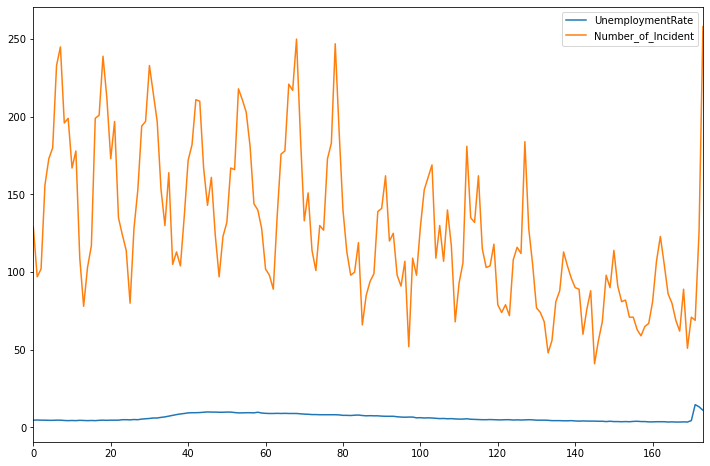

In [98]:
vis = pd.concat([eco,y],axis = 1)
vis[['UnemploymentRate','Number_of_Incident']].plot(figsize = (12, 8))

<AxesSubplot:>

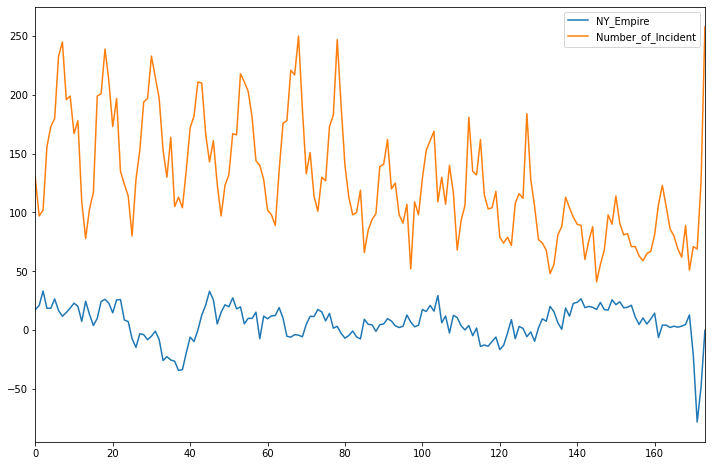

In [99]:
vis[['NY_Empire','Number_of_Incident']].plot(figsize = (12, 8))

<AxesSubplot:>

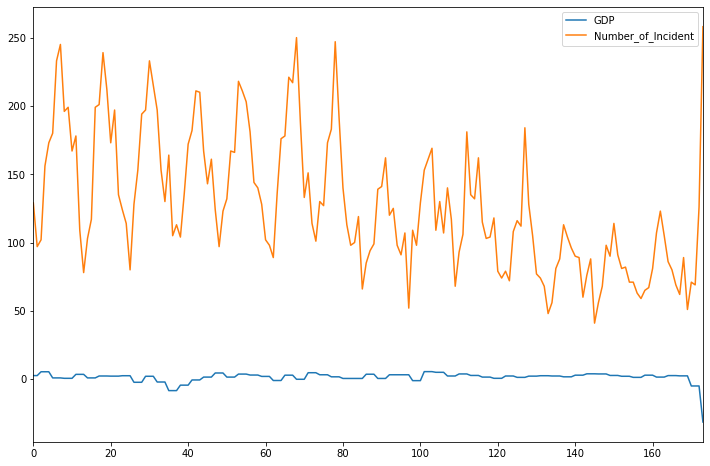

In [100]:
vis[['GDP','Number_of_Incident']].plot(figsize = (12, 8))

In [101]:
# Data split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(eco, 
                                                    y, 
                                                    random_state=42, test_size = 0.2
                                                   )

In [102]:
# linear regression 
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predicted_lr = model_lr.predict(X_test)

In [103]:
# Linear Regression evaluation
from sklearn.metrics import r2_score,mean_squared_error
score_lr = model_lr.score(X_train, y_train, sample_weight=None)
r2__lr = r2_score(y_test, predicted_lr)
mse_lr = mean_squared_error(y_test
                            , predicted_lr)
rmse_lr = np.sqrt(mse_lr)

In [104]:
linear_reg = pd.DataFrame({'Model Score':score_lr,"r2 stat":r2__lr,'MSE':mse_lr,"Root MSE": rmse_lr },index=[0]).T
linear_reg.columns = ['Metrics for linear regression']

In [105]:
linear_reg = pd.DataFrame({'Model Score':score_lr,"r2 stat":r2__lr,'MSE':mse_lr,"Root MSE": rmse_lr },index=[0]).T
linear_reg.columns = ['Metrics for linear regression']

In [106]:
linear_reg

,Metrics for linear regression
Model Score,0.230394
r2 stat,-0.276876
MSE,3768.778836
Root MSE,61.390381


In [107]:
#Decision Tree Regression
model_dt = DecisionTreeRegressor(criterion='mse',splitter="best")
model_dt.fit(X_train,y_train)
predicted_dt = model_dt.predict(X_test)

# Decision Tree evaluation
score_dt = model_dt.score(X_train, y_train, sample_weight=None)
r2__dt = r2_score(y_test, predicted_dt)
mse_dt = mean_squared_error(y_test
                            , predicted_dt)
rmse_dt = np.sqrt(mse_dt)
dt_reg = pd.DataFrame({'Model Score':score_dt,"r2 stat":r2__dt,'MSE':mse_dt,"Root MSE": rmse_dt },index=[0]).T
dt_reg.columns = ['Metrics for decision tree regression']

In [111]:
#Random Forest Regression
model_rf = RandomForestRegressor(n_estimators= 100, criterion= "mse")
model_rf.fit(X_train,y_train)
predicted_rf= model_rf.predict(X_test)

# Random forest evaluation
score_rf = model_rf.score(X_train, y_train, sample_weight=None)
r2__rf = r2_score(y_test, predicted_rf)
mse_rf = mean_squared_error(y_test
                            , predicted_rf)
rmse_rf = np.sqrt(mse_rf)
rf_reg = pd.DataFrame({'Model Score':score_rf,"r2 stat":r2__rf,'MSE':mse_rf,"Root MSE": rmse_rf },index=[0]).T
rf_reg.columns = ['Metrics for  random forest regression']

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='1'>

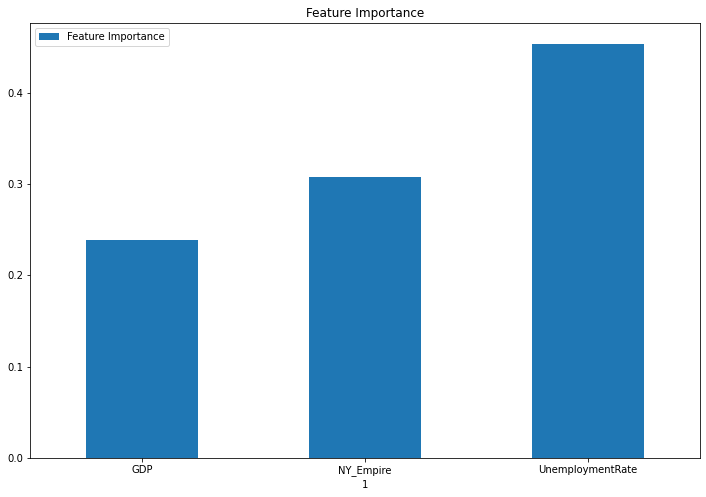

In [114]:
#feature importance
importance_df = pd.DataFrame(sorted(zip(model_rf.feature_importances_,X_train.columns),reverse = True))
importance_df.set_index(importance_df[1],inplace = True)
importance_df.drop(columns = 1,inplace = True)
importance_df.rename(columns = {0: "Feature Importance"},inplace = True)
importance_sorted = importance_df.sort_values(by="Feature Importance")
importance_sorted.plot(kind = "bar",title = 'Feature Importance',figsize = (12,8),rot = 360)

In [112]:
result = pd.concat([linear_reg,dt_reg,rf_reg],axis = 1 )

In [113]:
result

,Metrics for linear regression,Metrics for decision tree regression,Metrics for random forest regression
Model Score,0.230394,0.999452,0.903018
r2 stat,-0.276876,-0.171273,0.195040
MSE,3768.778836,3457.085714,2375.890473
Root MSE,61.390381,58.796987,48.743107
